## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Sun Jan 19 18:45:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.86       Driver Version: 430.86       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1050   WDDM  | 00000000:01:00.0  On |                  N/A |
| 35%   28C    P8    N/A /  75W |    539MiB /  2048MiB |      4%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
import numpy as np
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y
# def preproc_y():
#     pass

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 10s 199us/step - loss: 1.9020 - acc: 0.3118 - val_loss: 1.7840 - val_acc: 0.3589
Epoch 2/100
50000/50000 [==============================] - 9s 188us/step - loss: 1.6990 - acc: 0.3910 - val_loss: 1.6621 - val_acc: 0.4021
Epoch 3/100
50000/50000 [==============================] - 10s 202us/step - loss: 1.6174 - acc: 0.4207 - val_loss: 1.6272 - val_acc: 0.4105
Epoch 4/100
50000/50000 [==============================] - 10s 206us/step - loss: 1.5452 - acc: 0.4490 - val_loss: 1.5305 - val_acc: 0.4543
Epoch 5/100
50000/50000 [==============================] - 9s 189us/step - loss: 1.5002 - acc: 0.4607 - val_loss: 1.5197 - val_acc: 0.4529
Epoch 6/100
50000/50000 [==============================] - 10s 199us/step - loss: 1.4623 - acc: 0.4762 - val_loss: 1.5346 - val_acc: 0.4508
Epoch 7/10

Epoch 45/100
50000/50000 [==============================] - 9s 180us/step - loss: 0.7002 - acc: 0.7511 - val_loss: 1.6488 - val_acc: 0.5213
Epoch 46/100
50000/50000 [==============================] - 9s 174us/step - loss: 0.6915 - acc: 0.7528 - val_loss: 1.6991 - val_acc: 0.5155
Epoch 47/100
50000/50000 [==============================] - 9s 177us/step - loss: 0.6873 - acc: 0.7532 - val_loss: 1.7053 - val_acc: 0.5249
Epoch 48/100
50000/50000 [==============================] - 9s 175us/step - loss: 0.6645 - acc: 0.7618 - val_loss: 1.8230 - val_acc: 0.5027
Epoch 49/100
50000/50000 [==============================] - 9s 176us/step - loss: 0.6568 - acc: 0.7644 - val_loss: 1.7188 - val_acc: 0.5217
Epoch 50/100
50000/50000 [==============================] - 9s 180us/step - loss: 0.6378 - acc: 0.7727 - val_loss: 1.8029 - val_acc: 0.5103
Epoch 51/100
50000/50000 [==============================] - 9s 173us/step - loss: 0.6236 - acc: 0.7757 - val_loss: 1.7931 - val_acc: 0.5093
Epoch 52/100
50000/5

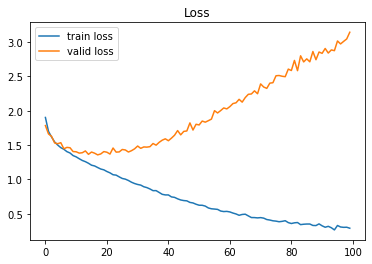

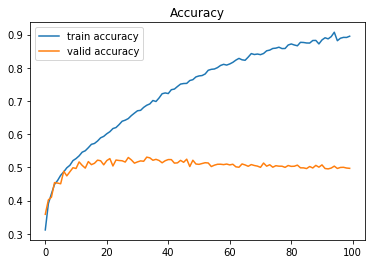

In [10]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()